In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("../CRIS_data/train_demand/demand_12138.csv")
df.head()

,'booking_date','journey_date','trnno','brdpt_code','resupto_code','cls','PSGN'
0,2023-04-03,2023-08-01,'12138','MRA ','CSMT','SL ',12
1,2023-04-08,2023-08-01,'12138','BPL ','DR ','3A ',2
2,2023-04-18,2023-08-01,'12138','NDLS','MTJ ','SL ',4
3,2023-04-24,2023-08-01,'12138','VGLJ','CSMT','2A ',3
4,2023-05-08,2023-08-01,'12138','DHO ','CSMT','3A ',6


In [3]:
df.shape

(736039, 7)

In [4]:
df.columns = df.columns.str.strip().str.strip("'")
cols_to_clean = ['brdpt_code', 'resupto_code', 'cls', 'trnno']
for col in cols_to_clean:
    df[col] = df[col].str.strip().str.strip("'")
    df[col] = df[col].str.strip()

df.head()

,booking_date,journey_date,trnno,brdpt_code,resupto_code,cls,PSGN
0,2023-04-03,2023-08-01,12138,MRA,CSMT,SL,12
1,2023-04-08,2023-08-01,12138,BPL,DR,3A,2
2,2023-04-18,2023-08-01,12138,NDLS,MTJ,SL,4
3,2023-04-24,2023-08-01,12138,VGLJ,CSMT,2A,3
4,2023-05-08,2023-08-01,12138,DHO,CSMT,3A,6


In [5]:
(df["brdpt_code"].unique())

array(['MRA', 'BPL', 'NDLS', 'VGLJ', 'DHO', 'BTI', 'FZR', 'AGC', 'HD',
       'RKMP', 'GWL', 'NDPM', 'ET', 'KNW', 'MTJ', 'KKP', 'ROK', 'BSL',
       'GJUT', 'BAU', 'FDK', 'BHS', 'LAR', 'BAQ', 'KKN', 'BINA', 'BPF',
       'RKM', 'JL', 'MSZ', 'BLZ', 'BRZ', 'GNA', 'DAA', 'CSN', 'SSB',
       'DBA', 'BGZ', 'JHL', 'JIND', 'MAUR', 'NRW', 'FDB', 'NK', 'BAB',
       'KSV', 'TUN', 'DKZ', 'MMR', 'KYN', 'DR'], dtype=object)

In [6]:
df["resupto_code"].unique()

array(['CSMT', 'DR', 'MTJ', 'NDLS', 'KYN', 'MMR', 'VGLJ', 'BPL', 'BSL',
       'AGC', 'KKN', 'DHO', 'BPF', 'RKMP', 'NK', 'KSV', 'BAB', 'GWL',
       'BAU', 'FDB', 'BHS', 'HD', 'SSB', 'BINA', 'KNW', 'ROK', 'BGZ',
       'CSN', 'ET', 'DKZ', 'LAR', 'DAA', 'DBA', 'JL', 'BAQ', 'MRA',
       'NDPM', 'RKM', 'NRW', 'JHL', 'BTI', 'JIND', 'MSZ', 'BLZ', 'FDK',
       'KKP', 'TUN', 'GJUT', 'BRZ', 'MAUR', 'GNA'], dtype=object)

In [7]:
print(df["journey_date"].value_counts())
print(df['journey_date'].dtype)


journey_date
2023-11-18    1530
2024-11-02    1495
2024-11-03    1410
2024-08-17    1410
2023-09-02    1392
              ... 
2025-06-23     783
2025-06-25     778
2025-07-01     766
2024-09-05     694
2024-10-31     657
Name: count, Length: 730, dtype: int64
object


In [8]:
pd.to_datetime(df['journey_date'])
pd.to_datetime(df['booking_date'])

0        2023-04-03
1        2023-04-08
2        2023-04-18
3        2023-04-24
4        2023-05-08
            ...    
736034   2025-08-01
736035   2025-08-01
736036   2025-08-01
736037   2025-08-01
736038   2025-08-01
Name: booking_date, Length: 736039, dtype: datetime64[ns]

In [9]:
df["PSGN"].describe()


count    736039.000000
mean          2.547173
std           3.160142
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max         185.000000
Name: PSGN, dtype: float64

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates # Add this line


(428, 7)


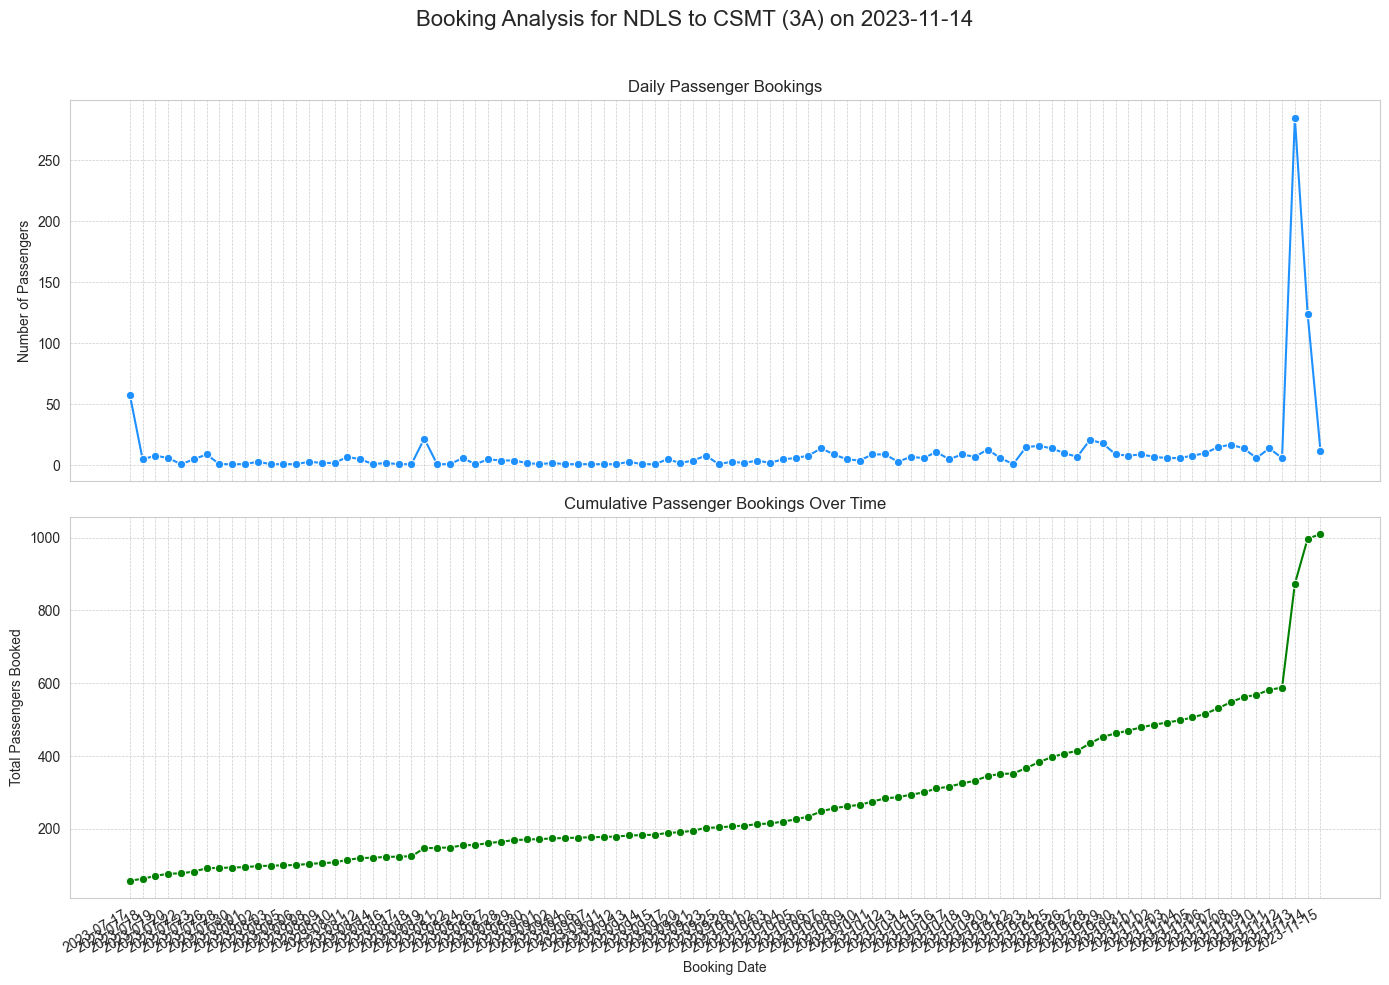

In [11]:


# 1. --- Define and filter for the specific journey ---
# Change these values to analyze the journey you are interested in.
journey_date_filter = '2023-11-14'
brdpt_code_filter = 'NDLS'
resupto_code_filter = 'CSMT'
cls_filter = '3A'

# Apply the filters
journey_df = df[
    (df['journey_date'] == journey_date_filter) &
    # (df['brdpt_code'] == brdpt_code_filter) &
    # (df['resupto_code'] == resupto_code_filter) &
    (df['cls'] == cls_filter)
].copy()

print(journey_df.shape)
# 2. --- Prepare the data for plotting ---
# Sort the data by booking date to ensure the cumulative sum is correct
journey_df = journey_df.sort_values(by='booking_date')
journey_df=journey_df.groupby('booking_date')['PSGN'].sum().reset_index()
# Calculate the cumulative sum of passengers
journey_df['cumulative_psgn'] = journey_df['PSGN'].cumsum()

# 3. --- Visualize the data ---
# 3. --- Visualize the data ---
# Set a nice plot style
sns.set_style("whitegrid")

# Create a figure with two subplots stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Title for the entire figure
fig.suptitle(f'Booking Analysis for {brdpt_code_filter} to {resupto_code_filter} ({cls_filter}) on {journey_date_filter}', fontsize=16)

# Plot 1: Daily Passenger Bookings (PSGN vs. Booking Date) - NOW INVISIBLE
sns.lineplot(ax=axes[0], x='booking_date', y='PSGN', data=journey_df, marker='o', color='dodgerblue')
axes[0].set_title('Daily Passenger Bookings')
axes[0].set_ylabel('Number of Passengers')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)


# Plot 2: Cumulative Passenger Bookings vs. Booking Date - NOW INVISIBLE
sns.lineplot(ax=axes[1], x='booking_date', y='cumulative_psgn', data=journey_df, marker='o', color='green')
axes[1].set_title('Cumulative Passenger Bookings Over Time')
axes[1].set_xlabel('Booking Date')
axes[1].set_ylabel('Total Passengers Booked')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
# date_format = mdates.DateFormatter('%d-%b')
# axes[1].xaxis.set_major_formatter(date_format)

# 2. Rotate the labels for better spacing
plt.setp(axes[1].get_xticklabels(), rotation=30, ha="right")

# Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.96]) 

# Make sure to uncomment this line to see the plot
plt.show()

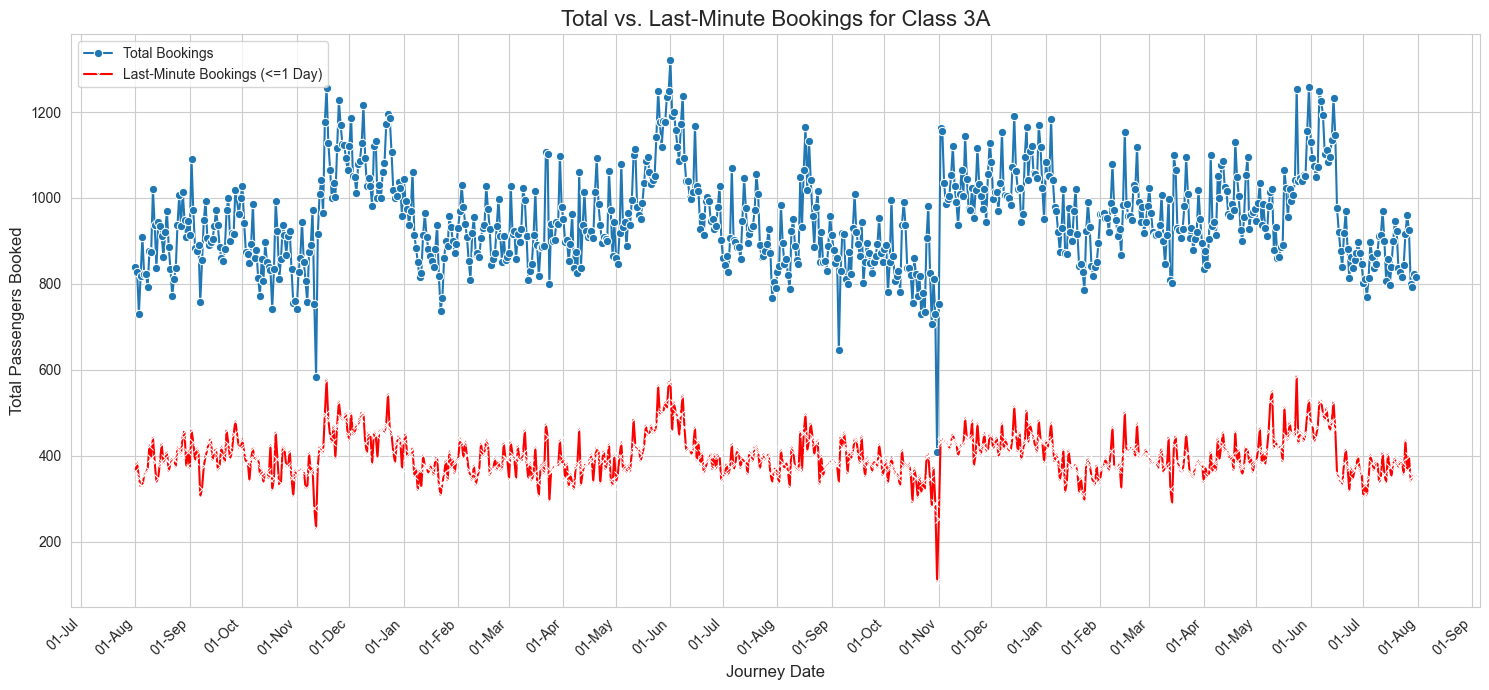

In [12]:


# Assume 'df' is your initial DataFrame
# Ensure date columns are in datetime format
df['booking_date'] = pd.to_datetime(df['booking_date'])
df['journey_date'] = pd.to_datetime(df['journey_date'])


# --- 1. DATA PREPARATION ---

# Filter for only class '3A'
df_3A = df[df['cls'] == '3A'].copy()

# A. Prepare the data for the FIRST line (total bookings)
daily_journey_df = df_3A.groupby('journey_date')['PSGN'].sum().reset_index()
daily_journey_df.rename(columns={'PSGN': 'total_psgn'}, inplace=True)

# B. Prepare the data for the SECOND line (last-minute bookings)
# Calculate the difference in days between booking and journey
df_3A['days_before_journey'] = (df_3A['journey_date'] - df_3A['booking_date']).dt.days

# Filter for bookings made 0 or 1 day before the journey
last_minute_bookings = df_3A[df_3A['days_before_journey'] <= 1]

# Group by journey date and sum the last-minute passengers
last_minute_summary = last_minute_bookings.groupby('journey_date')['PSGN'].sum().reset_index()
last_minute_summary.rename(columns={'PSGN': 'last_minute_psgn'}, inplace=True)

# C. Merge the two datasets for easy plotting
combined_df = pd.merge(daily_journey_df, last_minute_summary, on='journey_date', how='left').fillna(0)


# --- 2. VISUALIZATION ---

plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")

# Create the line plot for the FIRST line (Total Passengers)
plot = sns.lineplot(
    x='journey_date',
    y='total_psgn',
    data=combined_df,
    marker='o',
    label='Total Bookings' # Add a label for the legend
)

# ADD THE SECOND line plot on the SAME axes (Last-Minute Passengers)
sns.lineplot(
    x='journey_date',
    y='last_minute_psgn',
    data=combined_df,
    marker='x',
    color='red',
    label='Last-Minute Bookings (<=1 Day)', # Add a label for the legend
    ax=plot # Tell seaborn to draw on the same plot object
)

# Set titles and labels
plot.set_title('Total vs. Last-Minute Bookings for Class 3A', fontsize=16)
plot.set_xlabel('Journey Date', fontsize=12)
plot.set_ylabel('Total Passengers Booked', fontsize=12)

# Format the x-axis ticks
plot.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
plot.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
plt.xticks(rotation=45, ha='right')
plt.legend() # Display the legend

plt.tight_layout()
plt.show()

In [13]:
daily_journey_df['day_of_week'] = daily_journey_df['journey_date'].dt.day_name()


# 2. --- Group by the day of the week and calculate the average ---
# This calculates the average 'total_psgn' for each unique day
avg_by_day = daily_journey_df.groupby('day_of_week')['total_psgn'].mean().reset_index()


# 3. --- Sort the results for better readability ---
# By default, the days will be sorted alphabetically (Friday, Monday, etc.)
# Let's sort them in the correct order of the week.
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_by_day['day_of_week'] = pd.Categorical(avg_by_day['day_of_week'], categories=days_order, ordered=True)
avg_by_day = avg_by_day.sort_values('day_of_week')

# --- Display the final averaged DataFrame ---
print("Average Total Passengers by Day of the Week:")
print(avg_by_day)


# # 4. --- Visualize the averages with a bar chart ---
# plt.figure(figsize=(10, 6))
# sns.set_style("whitegrid")

# plot = sns.barplot(
#     x='day_of_week',
#     y='total_psgn',
#     data=avg_by_day
# )

# plot.set_title('Average Total Passengers by Day of the Week', fontsize=16)
# plot.set_xlabel('Day of the Week', fontsize=12)
# plot.set_ylabel('Average Total Passengers', fontsize=12)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

Average Total Passengers by Day of the Week:
  day_of_week   total_psgn
1      Monday   928.625000
5     Tuesday   913.504762
6   Wednesday   920.971429
4    Thursday   902.538462
0      Friday   969.971154
2    Saturday  1049.144231
3      Sunday   960.855769


In [14]:
daily_journey_df['month'] = daily_journey_df['journey_date'].dt.month_name()


# 2. --- Group by the month and calculate the average ---
avg_by_month = daily_journey_df.groupby('month')['total_psgn'].mean()


# 3. --- Sort the results for in chronological order ---
# By default, months are sorted alphabetically. We'll sort them correctly.
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
avg_by_month = avg_by_month.reindex(months_order).dropna()

# --- Display the final averaged DataFrame ---
print("Average Total Passengers by Month:")
print(avg_by_month)


Average Total Passengers by Month:
month
January       915.951613
February      944.280702
March         935.032258
April         955.683333
May          1023.516129
June         1026.266667
July          881.935484
August        906.693548
September     896.016949
October       845.580645
November     1001.583333
December     1060.274194
Name: total_psgn, dtype: float64


Busiest Routes for Class 3A by Percentage:
            route  total_passengers  percentage
488    FZR - NDLS             88407   12.757548
254    BTI - NDLS             33068    4.771869
181    BPL - CSMT             33013    4.763932
916   NDLS - CSMT             25697    3.708199
439    FDK - NDLS             23077    3.330120
1131  VGLJ - CSMT             17348    2.503398
576    GWL - CSMT             16321    2.355197
8      AGC - CSMT             15461    2.231095
67     BAU - CSMT             14370    2.073659
936     NDLS - NK             12891    1.860232


C:\Users\mailt\AppData\Local\Temp\ipykernel_2428\1775740471.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(


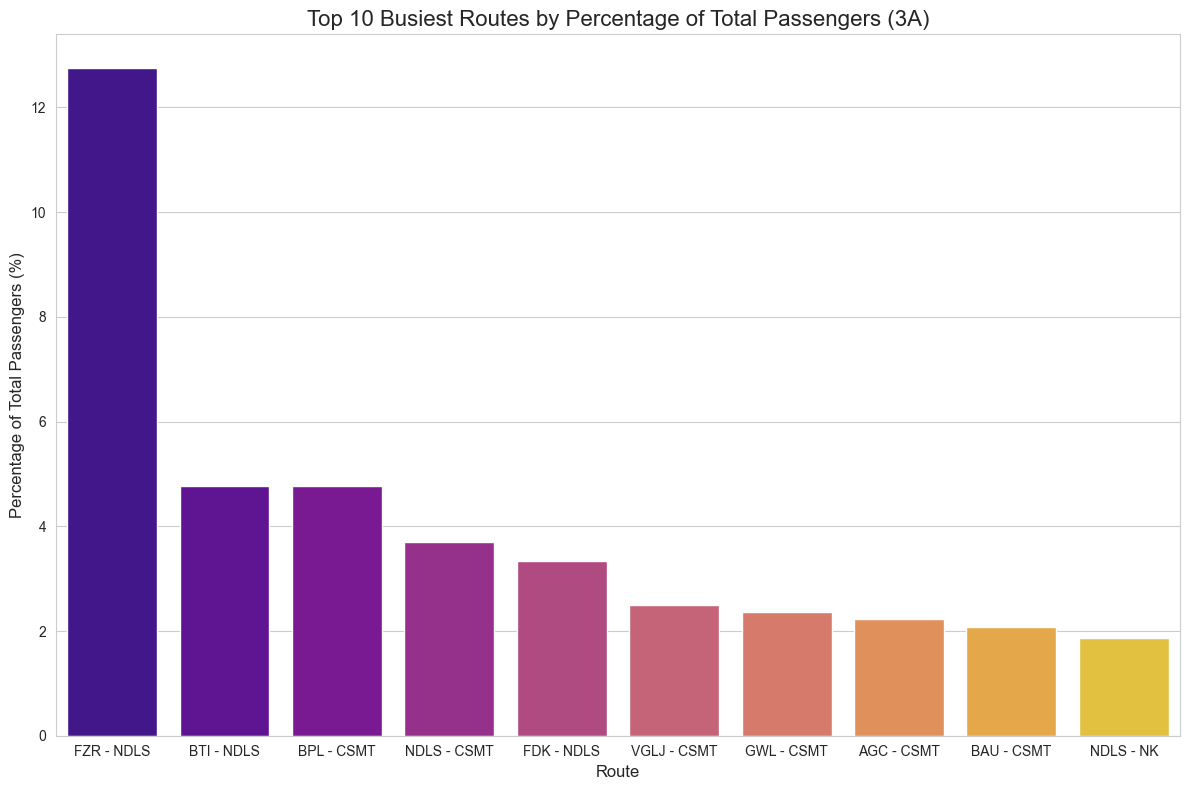

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'df' is your existing DataFrame

# 1. --- Filter and create the canonical 'route' (same as before) ---
df_3A = df[df['cls'] == '3A'].copy()
df_3A['route'] = df_3A.apply(
    lambda row: ' - '.join(([row['brdpt_code'], row['resupto_code']])),
    axis=1
)

# 2. --- Group, sum, and sort (same as before) ---
busiest_routes = df_3A.groupby('route')['PSGN'].sum().reset_index()
busiest_routes.rename(columns={'PSGN': 'total_passengers'}, inplace=True)


# --- 3. NEW: Calculate the percentage for each route ---
# First, find the grand total of all passengers
grand_total_passengers = busiest_routes['total_passengers'].sum()

# Now, create a new 'percentage' column
busiest_routes['percentage'] = (busiest_routes['total_passengers'] / grand_total_passengers) * 100

# Sort by the new percentage column to ensure the order is correct
busiest_routes = busiest_routes.sort_values(by='percentage', ascending=False)


# --- Display the updated DataFrame ---
print("Busiest Routes for Class 3A by Percentage:")
print(busiest_routes.head(10))


# --- 4. MODIFIED: Visualize the results in percentage terms ---
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

plot = sns.barplot(
    # --- CHANGE: Use the new 'percentage' column for the x-axis ---
    y='percentage',
    x='route',
    data=busiest_routes.head(10),
    palette='plasma' # Changed palette for a new look
)

# --- CHANGE: Update titles and labels ---
plot.set_title('Top 10 Busiest Routes by Percentage of Total Passengers (3A)', fontsize=16)
plot.set_ylabel('Percentage of Total Passengers (%)', fontsize=12)
plot.set_xlabel('Route', fontsize=12)

plt.tight_layout()
plt.show()

In [16]:
daily_journey_df.describe()

,journey_date,total_psgn
count,730,730.000000
mean,2024-07-31 10:05:35.342465792,949.284932
min,2023-08-01 00:00:00,410.000000
25%,2024-01-31 06:00:00,872.250000
50%,2024-07-31 12:00:00,935.500000
75%,2025-01-29 18:00:00,1018.000000
max,2025-07-31 00:00:00,1320.000000
std,NaN,109.210603


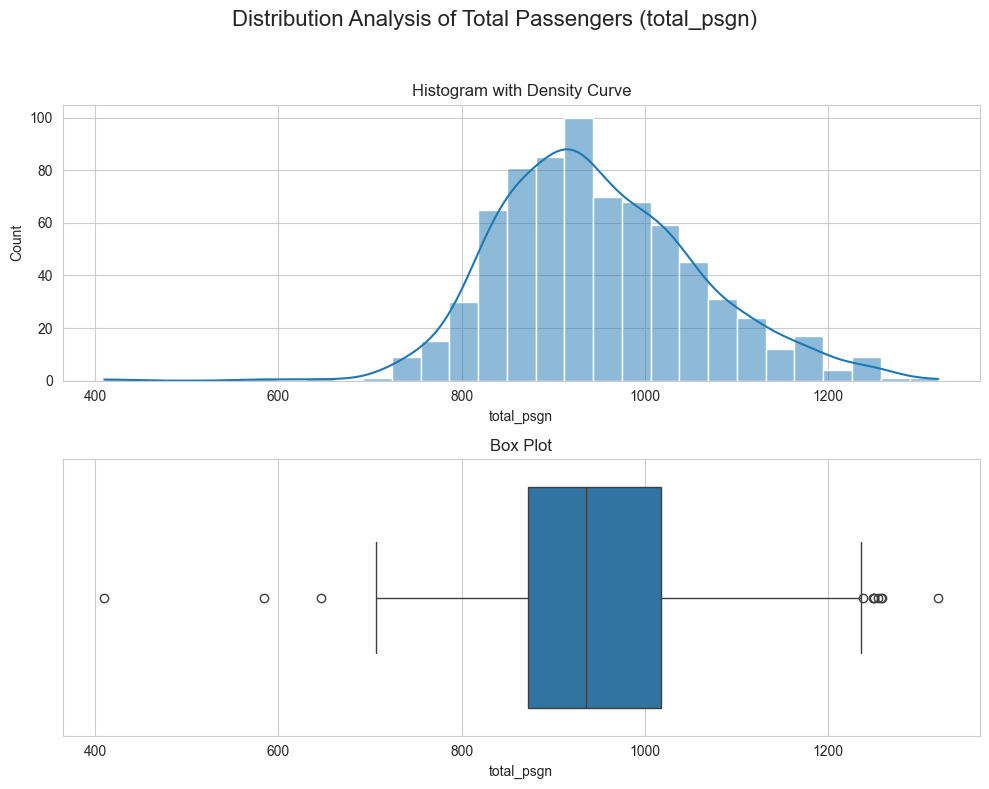

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Distribution Analysis of Total Passengers (total_psgn)', fontsize=16)


# 1. --- Create the Distribution Plot (Histogram + KDE) ---
sns.histplot(
    ax=axes[0],
    data=daily_journey_df,
    x='total_psgn',
    kde=True  # This adds the density line, creating the distplot effect
)
axes[0].set_title('Histogram with Density Curve')


# 2. --- Create the Box Plot ---
sns.boxplot(
    ax=axes[1],
    data=daily_journey_df,
    x='total_psgn'
)
axes[1].set_title('Box Plot')


# --- Display the plots ---
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout for the suptitle
plt.show()


In [18]:
daily_journey_df_high= daily_journey_df[daily_journey_df["total_psgn"]>1000].copy()
print(daily_journey_df_high.shape)
with pd.option_context('display.max_rows', None):
    print(daily_journey_df_high)


(217, 4)
    journey_date  total_psgn day_of_week      month
10    2023-08-11        1020      Friday     August
25    2023-08-26        1006    Saturday     August
27    2023-08-28        1014      Monday     August
32    2023-09-02        1091    Saturday  September
57    2023-09-27        1019   Wednesday  September
59    2023-09-30        1001    Saturday  September
60    2023-10-01        1029      Sunday    October
104   2023-11-14        1009     Tuesday   November
105   2023-11-15        1042   Wednesday   November
107   2023-11-17        1177      Friday   November
108   2023-11-18        1257    Saturday   November
109   2023-11-19        1128      Sunday   November
110   2023-11-20        1066      Monday   November
112   2023-11-22        1036   Wednesday   November
113   2023-11-23        1002    Thursday   November
114   2023-11-24        1116      Friday   November
115   2023-11-25        1227    Saturday   November
116   2023-11-26        1170      Sunday   November
117

In [19]:
dff=daily_journey_df_high.groupby('day_of_week')['month'].count().reset_index()
dff

,day_of_week,month
0,Friday,33
1,Monday,25
2,Saturday,67
3,Sunday,33
4,Thursday,18
5,Tuesday,18
6,Wednesday,23


In [20]:
daily_journey_df_low= daily_journey_df[daily_journey_df["total_psgn"]<850].copy()
print(daily_journey_df_low.shape)
with pd.option_context('display.max_rows', None):
    print(daily_journey_df_low)


(123, 4)
    journey_date  total_psgn day_of_week      month
0     2023-08-01         839     Tuesday     August
1     2023-08-02         828   Wednesday     August
2     2023-08-03         731    Thursday     August
3     2023-08-04         819      Friday     August
5     2023-08-06         822      Sunday     August
6     2023-08-07         822      Monday     August
7     2023-08-08         794     Tuesday     August
12    2023-08-13         838      Sunday     August
20    2023-08-21         834      Monday     August
21    2023-08-22         773     Tuesday     August
22    2023-08-23         811   Wednesday     August
23    2023-08-24         836    Thursday     August
37    2023-09-07         759    Thursday  September
64    2023-10-05         849    Thursday    October
69    2023-10-10         813     Tuesday    October
70    2023-10-11         773   Wednesday    October
72    2023-10-13         808      Friday    October
75    2023-10-16         839      Monday    October
76 

In [21]:
dff_low=daily_journey_df_low.groupby('day_of_week')['month'].count().reset_index()
dff_low

,day_of_week,month
0,Friday,7
1,Monday,24
2,Saturday,2
3,Sunday,10
4,Thursday,32
5,Tuesday,28
6,Wednesday,20


Original DataFrame shape: (730, 4)
First half shape (first 364 rows): (364, 4)
Second half shape (the rest): (366, 4)


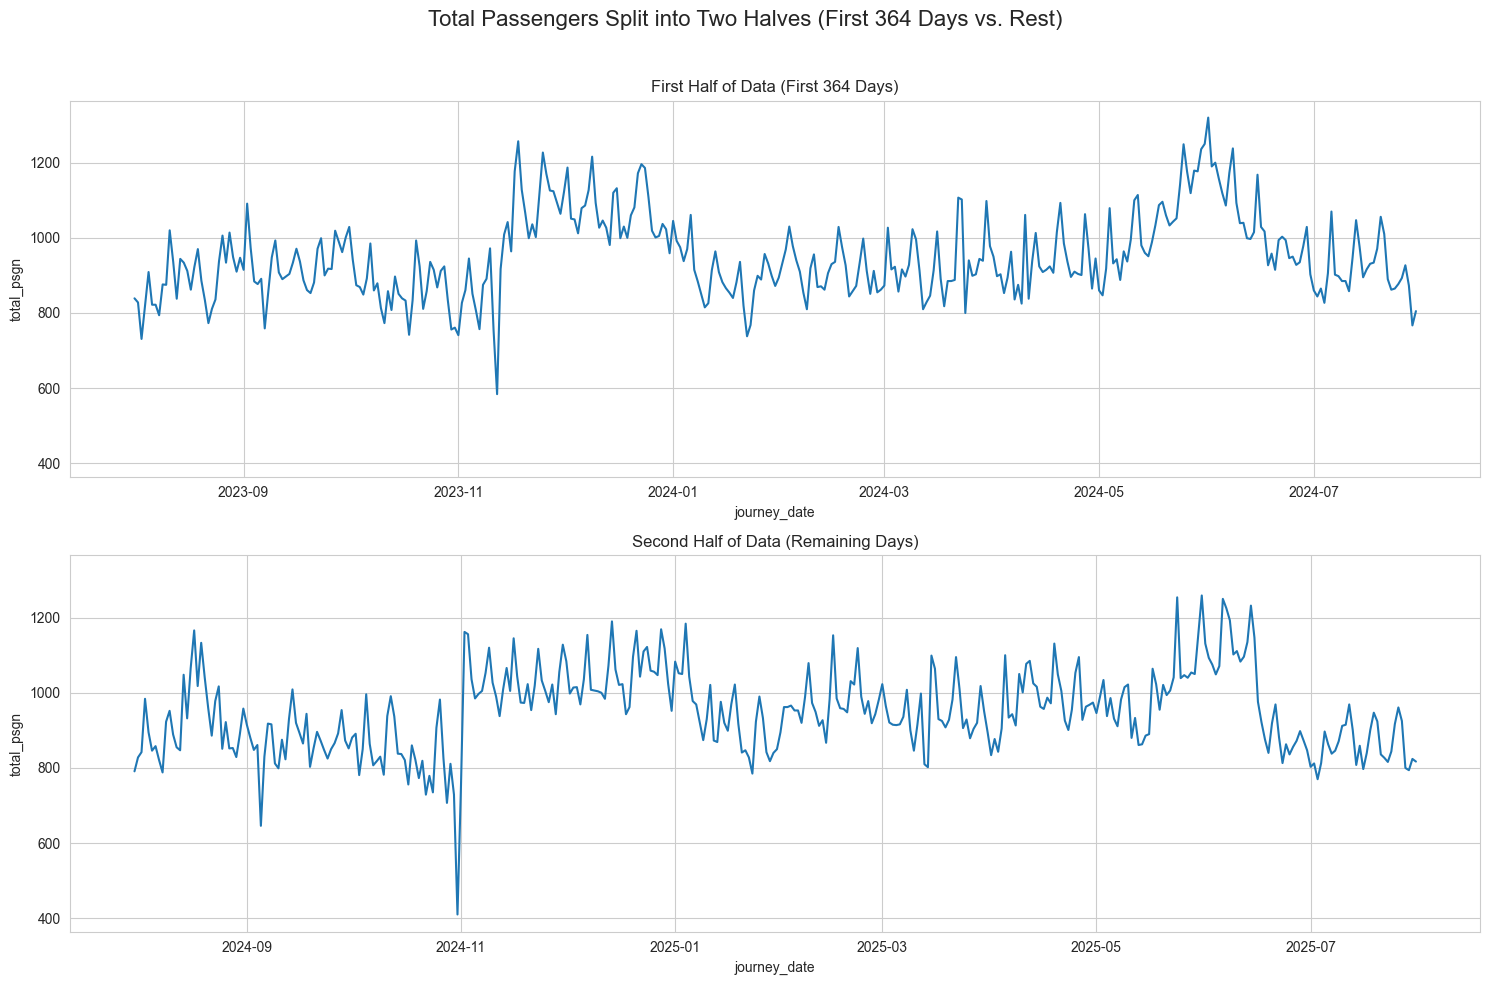


--- Correlation Analysis ---
The correlation between the passenger counts of the two halves is: 0.5986


In [22]:



daily_journey_df = daily_journey_df.sort_values('journey_date').reset_index(drop=True)


# --- 1. Split the DataFrame into the first 364 rows and the rest ---
split_point = 364
daily_journey_df1 = daily_journey_df.iloc[:split_point].copy()
daily_journey_df2 = daily_journey_df.iloc[split_point:].copy()

print(f"Original DataFrame shape: {daily_journey_df.shape}")
print(f"First half shape (first 364 rows): {daily_journey_df1.shape}")
print(f"Second half shape (the rest): {daily_journey_df2.shape}")


# --- 2. Visualize the Two Halves ---
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=False, sharey=True)
fig.suptitle('Total Passengers Split into Two Halves (First 364 Days vs. Rest)', fontsize=16)

# Plot for the first half
sns.lineplot(ax=axes[0], x='journey_date', y='total_psgn', data=daily_journey_df1)
axes[0].set_title('First Half of Data (First 364 Days)')

# Plot for the second half
sns.lineplot(ax=axes[1], x='journey_date', y='total_psgn', data=daily_journey_df2)
axes[1].set_title('Second Half of Data (Remaining Days)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# --- 3. Calculate the Correlation ---
# Align the two series from their start and compare up to the length of the shorter one
df1_vals = daily_journey_df1['total_psgn'].reset_index(drop=True)
df2_vals = daily_journey_df2['total_psgn'].reset_index(drop=True)
min_len = min(len(df1_vals), len(df2_vals))

# Calculate the Pearson correlation coefficient
correlation = df1_vals.iloc[:min_len].corr(df2_vals.iloc[:min_len])

print("\n--- Correlation Analysis ---")
print(f"The correlation between the passenger counts of the two halves is: {correlation:.4f}")

In [23]:
# histograms of df1 , df2, df3, df4 groupby('day_of_week')['month'].count().reset_index()
df1= daily_journey_df1.groupby('day_of_week')['total_psgn'].mean().reset_index()
df2= daily_journey_df2.groupby('day_of_week')['total_psgn'].mean().reset_index()
print(df1)
print(df2)

  day_of_week   total_psgn
0      Friday   976.576923
1      Monday   930.653846
2    Saturday  1042.326923
3      Sunday   953.519231
4    Thursday   913.313725
5     Tuesday   910.754717
6   Wednesday   923.038462
  day_of_week   total_psgn
0      Friday   963.365385
1      Monday   926.596154
2    Saturday  1055.961538
3      Sunday   968.192308
4    Thursday   892.169811
5     Tuesday   916.307692
6   Wednesday   918.943396


In [24]:
daily_journey_df.to_pickle("dailyDataT12138.pkl")


In [25]:
df_ndls_csmt= df[(df['brdpt_code']=="NDLS") &( df['resupto_code']=="CSMT")].copy()
df_ndls_csmt_3A= df_ndls_csmt[(df_ndls_csmt['cls']=="3A")].copy()
df_ndls_csmt_3A_book= (df_ndls_csmt_3A.groupby('journey_date')['PSGN'].sum().reset_index())

df_ndls_csmt_3A_book.to_pickle("dailyDataT12138NdlsCsmt.pkl")
